In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
with open('pivot4years.pkl','rb') as pkldfile :
    pivotByYear=pickle.load(pkldfile)

In [3]:
pivotByYear['2006'].head()

TRANSACTION_DATE,2006
BUYER_COUNTY,
ADDISON,767400.0
AGUADA,49200.0
AGUADILLA,192200.0
AGUAS BUENAS,28500.0
ALACHUA,7333056.0


In [4]:
for i in pivotByYear.keys() : print(pivotByYear[i].shape) 

(1845, 1)
(1839, 1)
(1837, 1)
(1840, 1)
(1837, 1)
(1840, 1)
(1845, 1)


In [5]:
import geopandas as gpd
uscounties = gpd.read_file('tl_2018_us_county/tl_2018_us_county.shp')


In [6]:
uscounties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819484,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [7]:
uscounties.shape

(3233, 18)

In [8]:
smallcounties = gpd.read_file('cb_2018_us_county_500k/cb_2018_us_county_500k.shp')


In [9]:
smallcounties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [10]:
smallcounties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
STATEFP     3233 non-null object
COUNTYFP    3233 non-null object
COUNTYNS    3233 non-null object
AFFGEOID    3233 non-null object
GEOID       3233 non-null object
NAME        3233 non-null object
LSAD        3233 non-null object
ALAND       3233 non-null int64
AWATER      3233 non-null int64
geometry    3233 non-null geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


In [11]:
smallcounties[smallcounties.STATEFP=='25'].head(20)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
270,25,001,00606927,0500000US25001,25001,Barnstable,06,1021048430,2360287543,"POLYGON ((-70.68698 41.52949, -70.68327 41.532..."
271,25,013,00606933,0500000US25013,25013,Hampden,06,1597996708,44417070,"POLYGON ((-73.07484 42.10615, -73.07305 42.106..."
272,25,025,00606939,0500000US25025,25025,Suffolk,06,150855103,160514584,"MULTIPOLYGON (((-70.93091 42.32160, -70.93025 ..."
342,25,007,00606930,0500000US25007,25007,Dukes,06,267300554,1004283994,"MULTIPOLYGON (((-70.80710 41.45858, -70.80258 ..."
343,25,017,00606935,0500000US25017,25017,Middlesex,06,2118197013,75365459,"POLYGON ((-71.89877 42.71142, -71.82380 42.709..."
958,25,005,00606929,0500000US25005,25005,Bristol,06,1432536921,357473379,"MULTIPOLYGON (((-70.83845 41.59646, -70.83595 ..."
1412,25,009,00606931,0500000US25009,25009,Essex,06,1275502663,870278700,"MULTIPOLYGON (((-70.58029 42.63602, -70.57509 ..."
1418,25,003,00606928,0500000US25003,25003,Berkshire,06,2400595902,50712902,"POLYGON ((-73.50814 42.08626, -73.49717 42.116..."
1419,25,011,00606932,0500000US25011,25011,Franklin,06,1810978987,65539241,"POLYGON ((-73.02301 42.74114, -73.02290 42.741..."
1420,25,021,00606937,0500000US25021,25021,Norfolk,06,1025886743,124979344,"MULTIPOLYGON (((-70.84466 42.24227, -70.84115 ..."


In [12]:
state_dict={ '25':'Massachusetts', '09':'Connecticut' , '23':'Maine', '33':'New Hampshire', '50':'Vermont' ,'44':'Rhode Island'  }

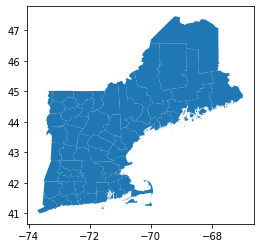

In [13]:
smallcounties[smallcounties['STATEFP'].isin(state_dict.keys())].plot()

In [14]:
necounties=smallcounties[smallcounties['STATEFP'].isin(state_dict.keys())].copy()

In [15]:
necounties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67 entries, 56 to 3161
Data columns (total 10 columns):
STATEFP     67 non-null object
COUNTYFP    67 non-null object
COUNTYNS    67 non-null object
AFFGEOID    67 non-null object
GEOID       67 non-null object
NAME        67 non-null object
LSAD        67 non-null object
ALAND       67 non-null int64
AWATER      67 non-null int64
geometry    67 non-null geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 5.8+ KB


In [16]:
for i in pivotByYear.keys():
    pivotByYear[i].index=pivotByYear[i].index.str.title()

In [17]:
pivotByYear['2006'].head()

TRANSACTION_DATE,2006
BUYER_COUNTY,
Addison,767400.0
Aguada,49200.0
Aguadilla,192200.0
Aguas Buenas,28500.0
Alachua,7333056.0


In [18]:
temp=necounties.merge(pivotByYear['2006'],left_on='NAME',right_on='BUYER_COUNTY')

In [19]:
geoOPyear=dict()
for i in pivotByYear.keys():
    geoOPyear[i]=necounties.merge(pivotByYear[i],left_on='NAME',right_on='BUYER_COUNTY')
    geoOPyear[i].drop(columns=['ALAND','AWATER'])

In [20]:
geoOPyear['2006']

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,2006
0,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",24486606.0
1,23,013,00581292,0500000US23013,23013,Knox,06,945684684,2017116243,"MULTIPOLYGON (((-68.55926 44.04502, -68.55504 ...",34936280.0
2,23,015,00581293,0500000US23015,23015,Lincoln,06,1180688991,631299424,"MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...",19294160.0
3,25,001,00606927,0500000US25001,25001,Barnstable,06,1021048430,2360287543,"POLYGON ((-70.68698 41.52949, -70.68327 41.532...",6526795.0
4,25,013,00606933,0500000US25013,25013,Hampden,06,1597996708,44417070,"POLYGON ((-73.07484 42.10615, -73.07305 42.106...",13992080.0
...,...,...,...,...,...,...,...,...,...,...,...
62,50,005,01461759,0500000US50005,50005,Caledonia,06,1680951719,22386387,"POLYGON ((-72.42985 44.51205, -72.41956 44.525...",793200.0
63,23,001,00581286,0500000US23001,23001,Androscoggin,06,1211956216,75580882,"POLYGON ((-70.48529 44.06040, -70.45974 44.086...",3441000.0
64,33,009,00873178,0500000US33009,33009,Grafton,06,4425249656,106464220,"POLYGON ((-72.33440 43.61925, -72.33236 43.625...",2615660.0
65,23,017,00581294,0500000US23017,23017,Oxford,06,5379210748,255895400,"POLYGON ((-71.08000 45.30699, -71.07841 45.306...",1660050.0


In [21]:
geoOPyear['2006'].columns

Index([ 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID',    'GEOID',     'NAME',
           'LSAD',    'ALAND',   'AWATER', 'geometry',       2006],
      dtype='object')

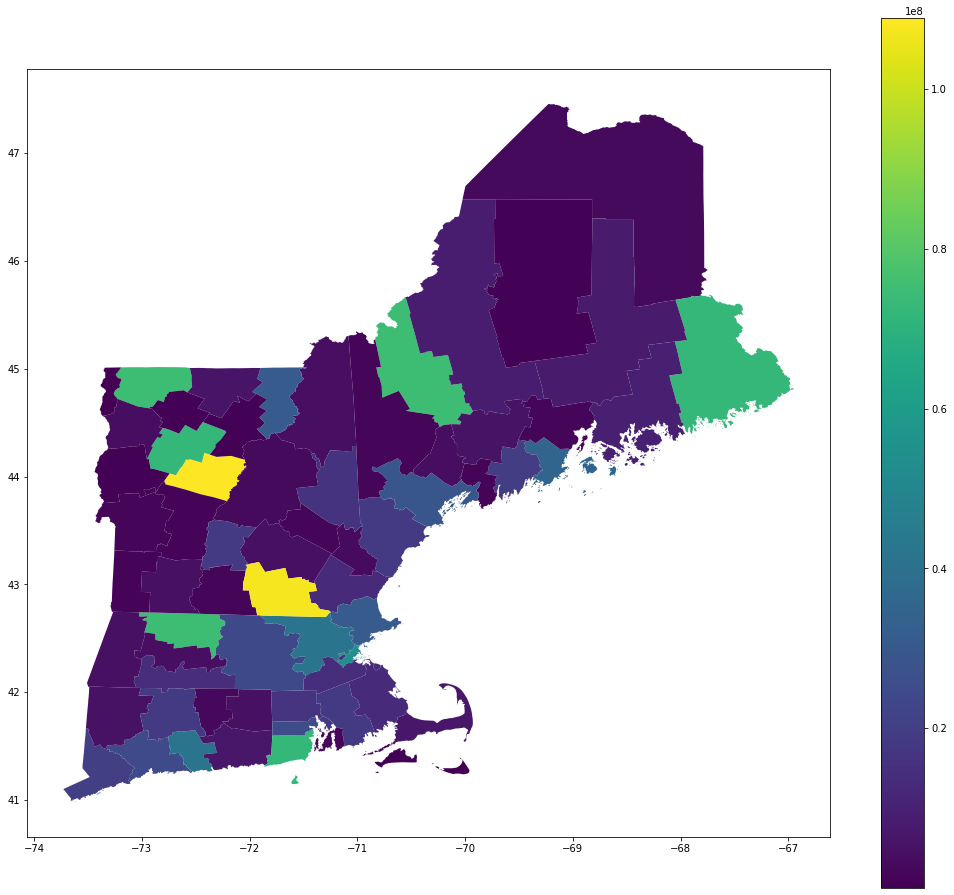

In [22]:
fig, ax = plt.subplots(figsize=(18,16));
geoOPyear['2006'].plot(column=2006,legend=True, ax=ax)

In [23]:
for i in geoOPyear.keys():
    geoOPyear[i]['inMillions']=geoOPyear[i][int(i)].divide(10**6)

In [24]:
yearmax=[  geoOPyear[i]['inMillions'].max()  for i in geoOPyear.keys() ]
vmax=max(yearmax)

yearmin=[  geoOPyear[i]['inMillions'].min()  for i in geoOPyear.keys() ]
vmin=max(yearmin)

In [25]:
print(vmin,vmax)

0.07813 167.301936


In [26]:
#method_list = [func for func in dir(gpd.plot) if callable(getattr(gpd.plot, func))]
#print(method_list)

AttributeError: module 'geopandas' has no attribute 'plot'

In [45]:
import inspect
print(inspect.getdoc(geoOPyear['2006'].plot))

Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
df : GeoDataFrame
    The GeoDataFrame to be plotted.  Currently Polygon,
    MultiPolygon, LineString, MultiLineString and Point
    geometries can be plotted.
column : str, np.array, pd.Series (default None)
    The name of the dataframe column, np.array, or pd.Series to be plotted.
    If np.array or pd.Series are used then it must have same length as
    dataframe. Values are used to color the plot. Ignored if `color` is
    also set.
cmap : str (default None)
    The name of a colormap recognized by matplotlib.
color : str (default None)
    If specified, all objects will be colored uniformly.
ax : matplotlib.pyplot.Artist (default None)
    axes on which to draw the plot
cax : matplotlib.pyplot Artist (default None)
    axes on which to draw the legend in case of color map.
categorical : bool (default 

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

for i in geoOPyear.keys():
    fig, ax = plt.subplots(figsize=(18,16));
    #sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    geoOPyear[i].plot(column='inMillions',legend=True, ax=ax,cax=cax, cmap='Blues', vmin=vmin, vmax=vmax , linewidth=0.8, edgecolor='0.1' )
    ax.axis('off')
    ax.set_title('Total dosage of opoids prescribed in the county (in Millions)', fontsize=24)
    reprpt=geoOPyear[i].geometry.representative_point()
    for x,y,label in zip(reprpt.geometry.x,reprpt.geometry.y,geoOPyear[i]['inMillions']):
        #ax.text(x,y,label,fontsize=24)
        ax.text(x,y,f'{label:.1f}',fontsize=12,horizontalalignment='center',verticalalignment='center' )
    ax.text( -69.0 ,42, str('Year:'+str(i)) , fontsize=36)
    
    cax.tick_params(labelsize=12) 
    ax.margins(x=0)
    ax.margins(y=0)
    filetitle=str( str(i) + '_presc.svg' )
    fig.savefig(filetitle,dpi=300,format='svg',bbox_inches='tight')
    plt.clf()

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>